# Analysis on the COVID-19 Pandemic Effects on South Korea

_The dataset used for this analysis is from kaggle, provided by DS4C: Data Science for COVID-19 in South Korea_

Using the TimeAge.csv dataset file having 450 rows and 4 columns.

In this analysis we will be seeking for answers to the questions:

The rate of increase of confirmed cases every 7 days?

The rate of fatalities from covid-19 by the day?

The most affected age group who are deceased?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('TimeAge.csv', index_col='date', parse_dates=True)

In [26]:
data.shape

(450, 4)

In [3]:
data.head(10)

,time,age,confirmed,deceased
date,,,,
2020-03-02,0,0s,32,0
2020-03-02,0,10s,169,0
2020-03-02,0,20s,1235,0
2020-03-02,0,30s,506,1
2020-03-02,0,40s,633,1
2020-03-02,0,50s,834,5
2020-03-02,0,60s,530,6
2020-03-02,0,70s,192,6
2020-03-02,0,80s,81,3


In [4]:
data_resampled = data.resample('7D')['confirmed', 'deceased'].mean()

Investigating the rate of increase of confirmed cases every 7 days?

In [5]:
data_resampled.index

DatetimeIndex(['2020-03-02', '2020-03-09', '2020-03-16', '2020-03-23',
               '2020-03-30', '2020-04-06', '2020-04-13', '2020-04-20'],
              dtype='datetime64[ns]', name='date', freq='7D')

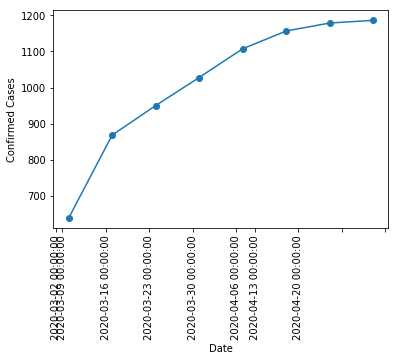

In [11]:
fig, ax = plt.subplots()
ax.plot(data_resampled.index, data_resampled['confirmed'], marker='o')
ax.set_xlabel('Date')
ax.set_xticklabels(data_resampled.index, rotation=90)
ax.set_ylabel('Confirmed Cases')
plt.show()

_The plot shows that new cases were confirmed every new week, with numbers higher than the previous week, therefore it could mean that the spread of the virus was already full blown among the south korean populace before it was detected_

Investigating the rate of fatalities by the day between March and April

In [7]:
data_deceased_grouped = data.groupby(data.index)['deceased', 'confirmed'].sum()

In [8]:
data_deceased_grouped

,deceased,confirmed
date,,
2020-03-02,22,4212
2020-03-03,28,4812
2020-03-04,32,5328
2020-03-05,35,5766
2020-03-06,42,6284
2020-03-07,44,6777
2020-03-08,50,7134
2020-03-09,51,7382
2020-03-10,54,7513


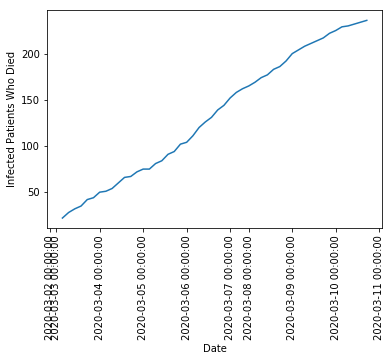

In [20]:
fig1, ax1 = plt.subplots()

ax1.plot(data_deceased_grouped.index, data_deceased_grouped['deceased'])
ax1.set_xlabel('Date')
ax1.set_xticklabels(data_deceased_grouped.index, rotation=90)
ax1.set_ylabel('Infected Patients Who Died')
plt.show()

_The graph shows that by the day between March and April 2020, the death rate from covid-19 increased at an alarming rate, now investing the most affected age group will give us insight to the population group who were mostly infected, confirmed and unfortunately died_

Investigating the most affected age group with higher number of deaths

In [22]:
data_age_grouped = data.groupby('age')['deceased', 'confirmed'].sum()

In [23]:
data_age_grouped

,deceased,confirmed
age,,
0s,0,5013
10s,0,23319
20s,0,123852
30s,52,47149
40s,82,60813
50s,472,83947
60s,1033,56161
70s,2046,28877
80s,2995,18136


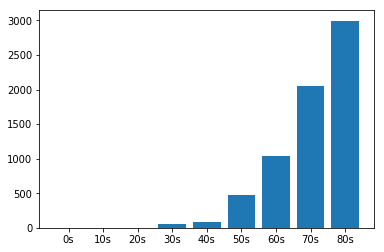

In [24]:
fig2, ax2 = plt.subplots()

ax2.bar(data_age_grouped.index, data_age_grouped['deceased'])

plt.show()

_The plot shows that infected persons from age 50 and above were the age group who experienced the most fatalities. It is now important to discover what is the social function by age distribution of these age groups in the South Korean population_

#### Conclusion
From indexmundi.com - link - indexmundi.com/south_korea/age_structure.html, the distribution of population according to age in south korea is as follows: 0 - 14 years (children), 15 - 24 (early working age), 25 - 54 years (prime working age), 55 - 64 years (mature working age), 65 years and over (elderly). 

It can be clearly seen that the *mature working age* and the *elderly* we're the most affected age group from the covid-19 pandemic between March and April 2020. It can be concluded that they will require new workforce population to resusitate and sustain their economy. 